In [1]:
import numpy as np
import pandas as pd
import pyrsm as rsm
from scipy import stats
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
nba_df = pd.read_parquet('nba_pgdata.parquet')
nba_df.head()

,Player,Salary,Age,FG,RB,AST,STL,BLK,PTS
0,A.J. Price,885.12,26,2.824561,2.000000,3.596491,0.578947,0.052632,7.736842
1,Aaron Brooks,3250.00,28,2.698113,1.509434,2.150943,0.566038,0.188679,7.094340
2,Al Harrington,6687.40,32,2.000000,2.700000,1.000000,0.400000,0.100000,5.100000
3,Al Horford,12000.00,26,7.783784,10.229730,3.243243,1.054054,1.054054,17.418919
4,Al Jefferson,15000.00,28,7.833333,9.230769,2.102564,1.025641,1.141026,17.833333


# Data Exploratory

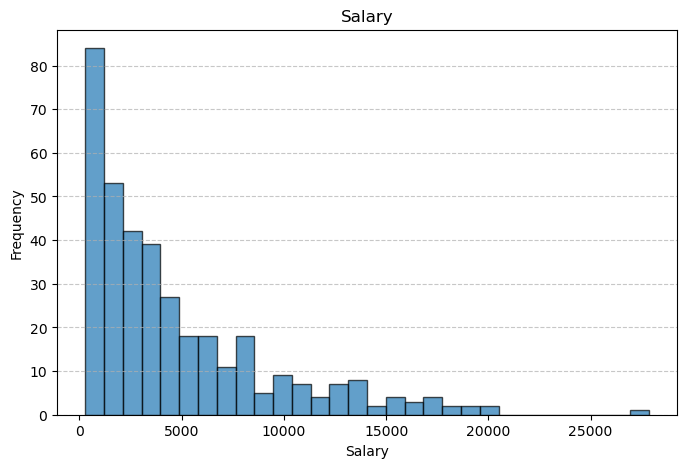

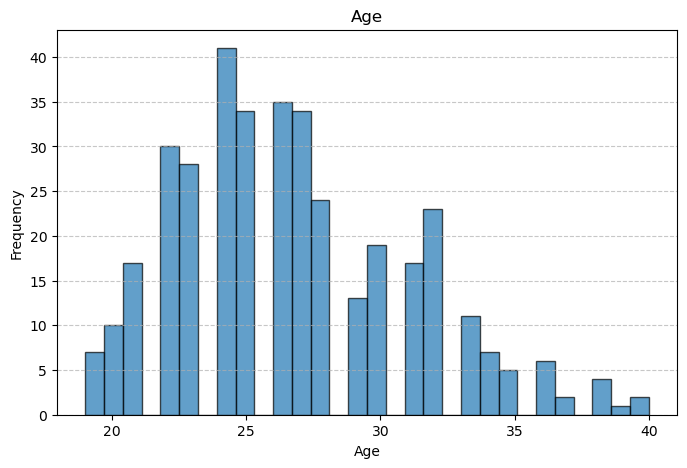

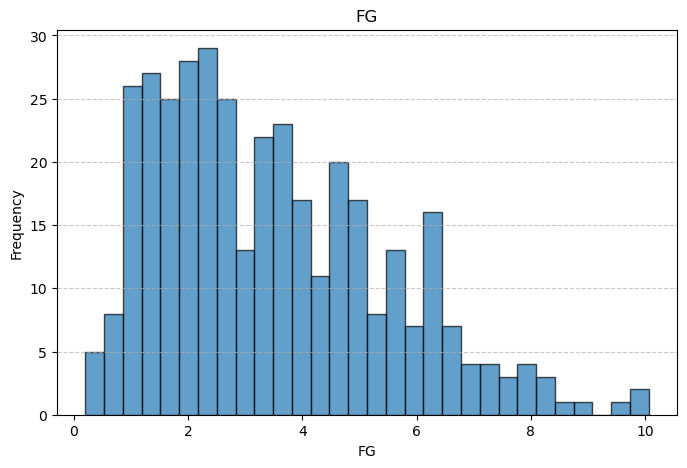

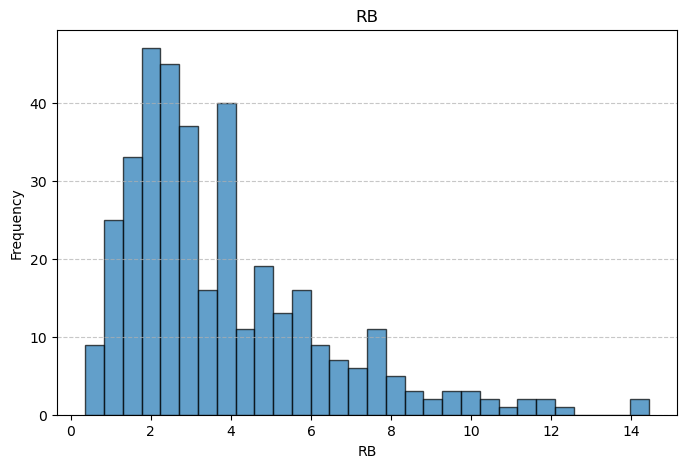

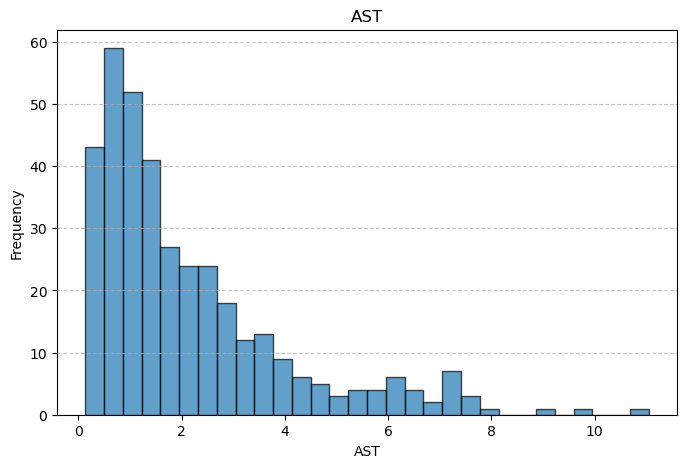

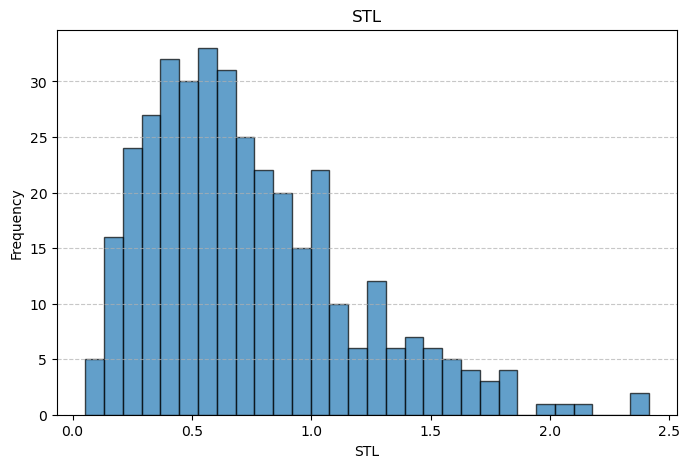

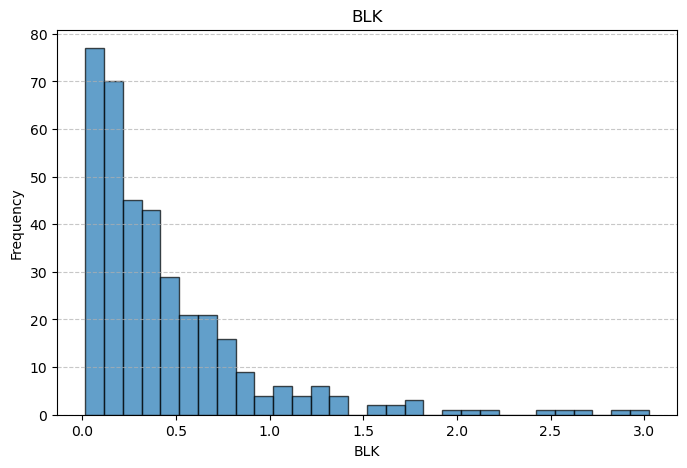

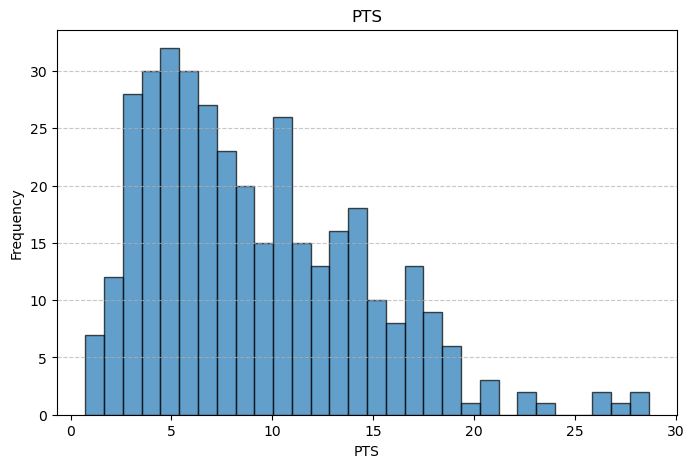

In [12]:
# List of variables to visualize
variables = ['Salary', 'Age', 'FG', 'RB', 'AST', 'STL', 'BLK', 'PTS']

# Create histograms for each variable
for var in variables:
    plt.figure(figsize=(8, 5))
    plt.hist(nba_df[var], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'{var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

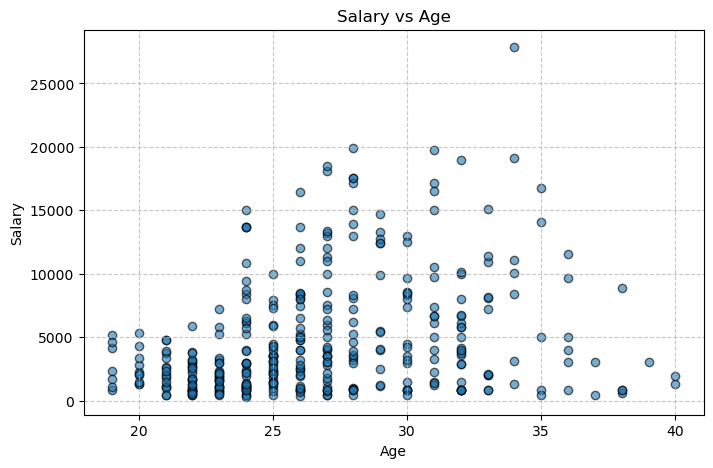

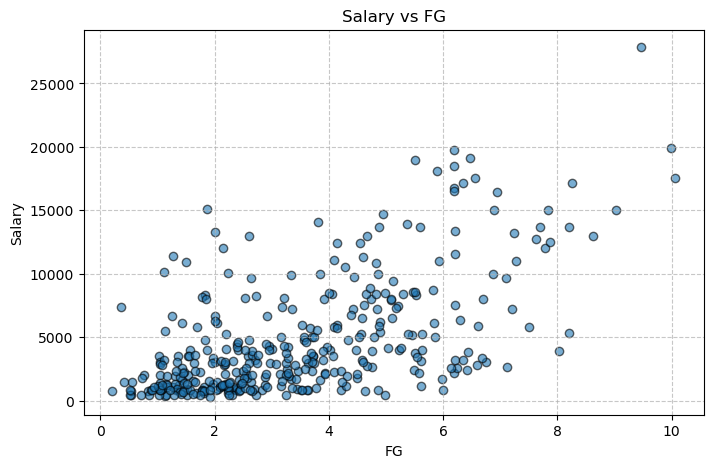

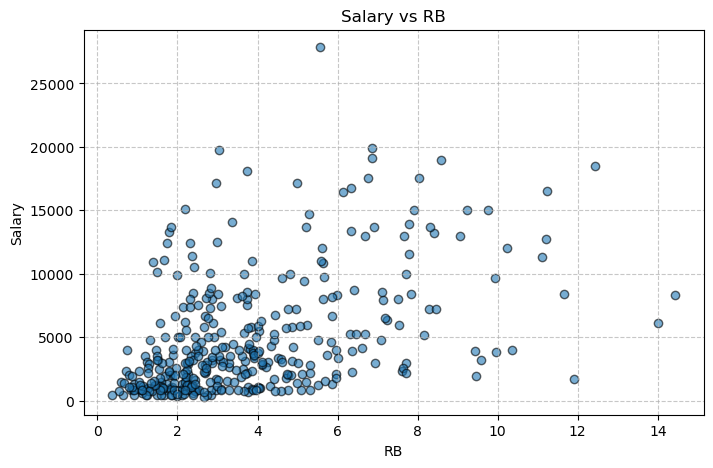

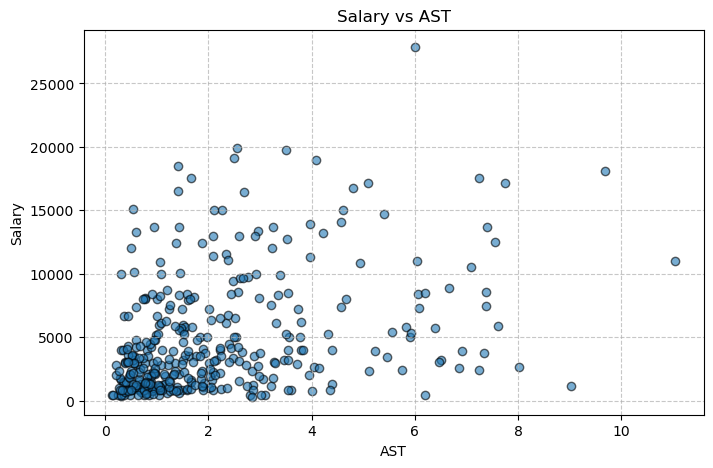

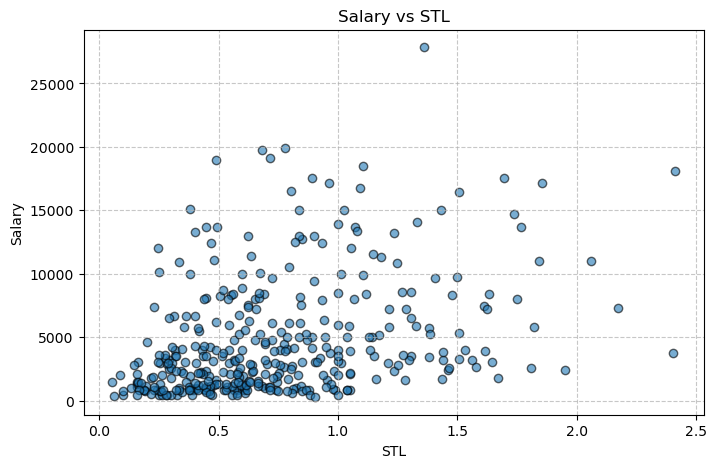

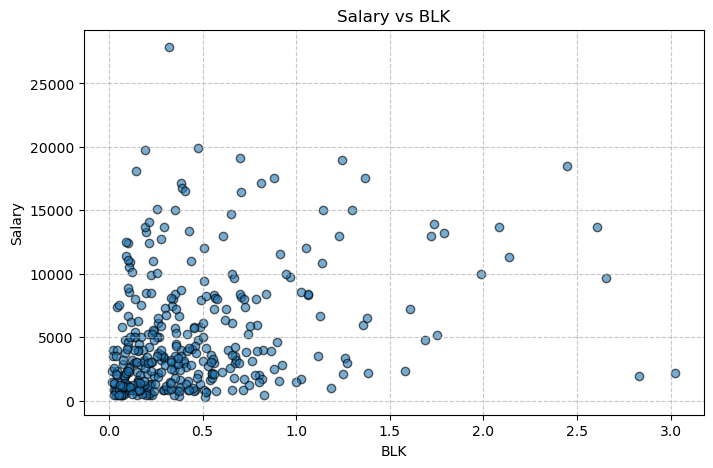

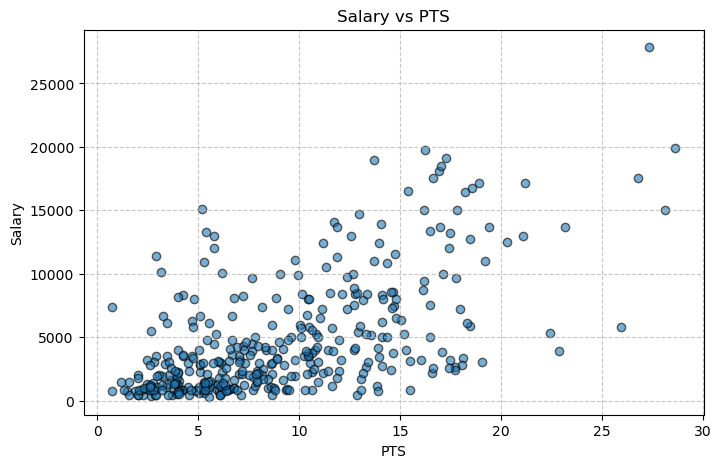

In [7]:
# Create scatterplots for Salary vs each variable
for var in variables[1:]:  # Skip 'Salary' as it's the dependent variable
    plt.figure(figsize=(8, 5))
    plt.scatter(nba_df[var], nba_df['Salary'], alpha=0.6, edgecolor='k')
    plt.title(f'Salary vs {var}')
    plt.xlabel(var)
    plt.ylabel('Salary')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Regression Analysis

### Regression A

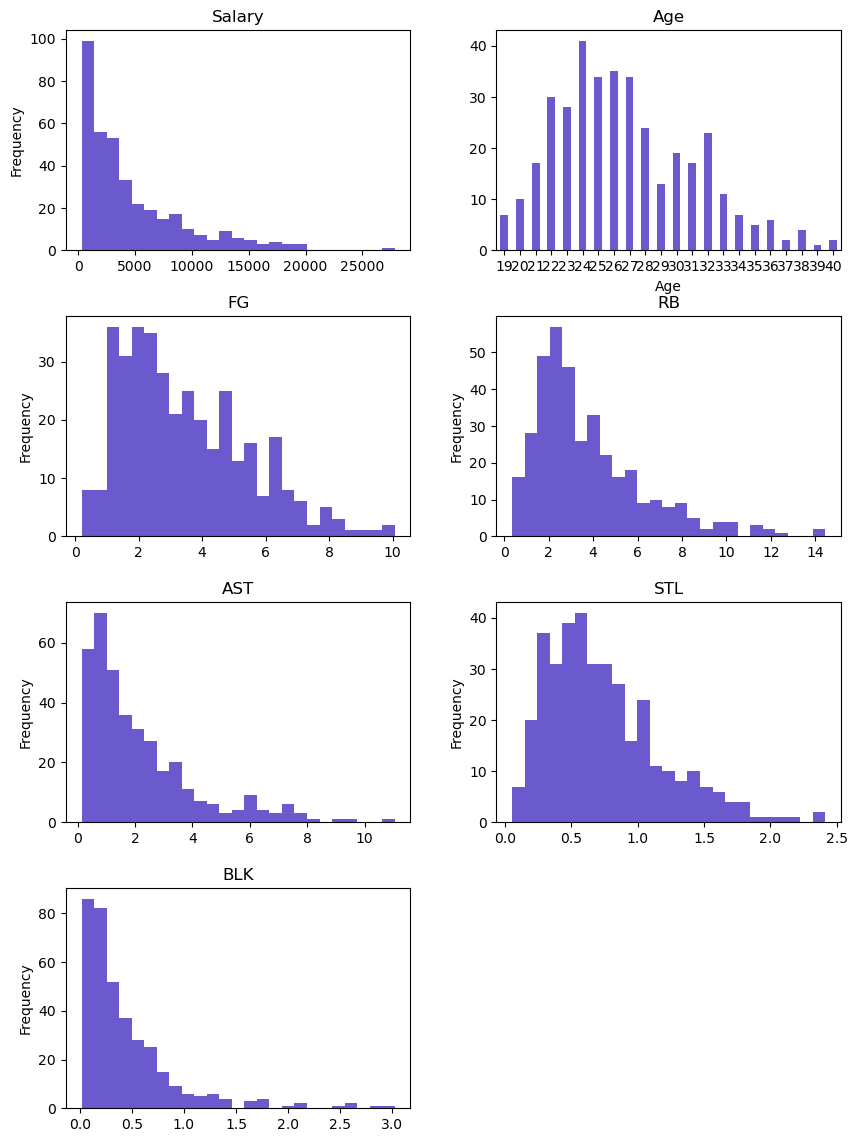

In [3]:
reg1 = rsm.regress({"nba_df": nba_df}, rvar="Salary", evar=["Age", "FG", "RB", "AST", "STL", "BLK"])
reg1.plot("distr")

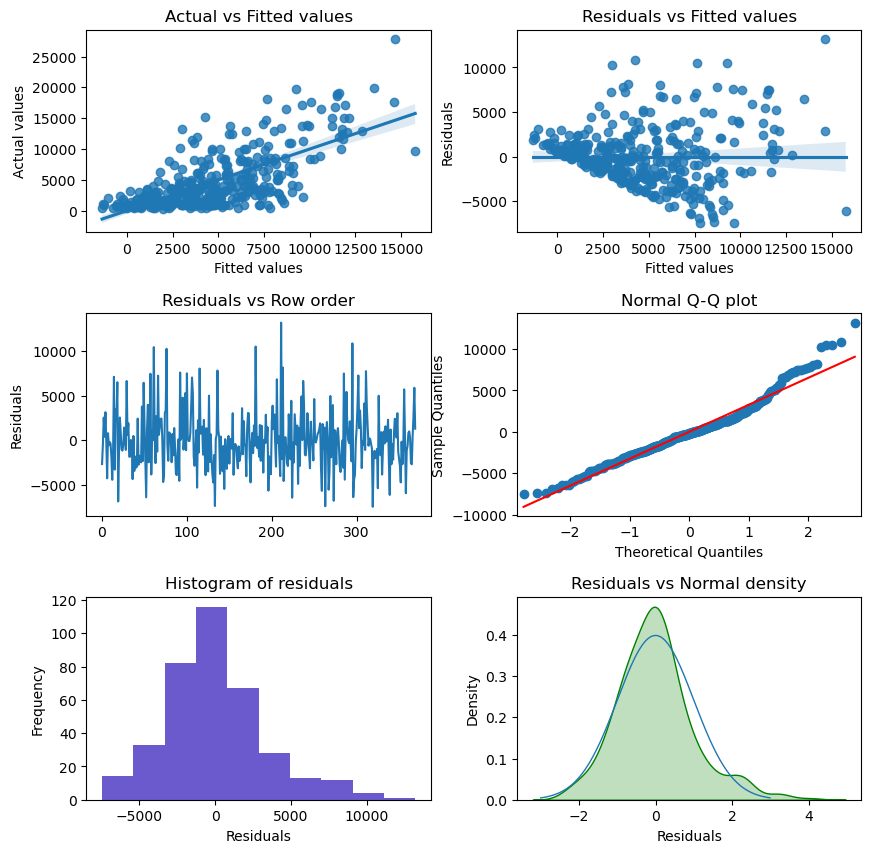

In [4]:
reg1.plot("dashboard")

In [5]:
reg1.summary()

Linear regression (OLS)
Data                 : nba_df
Response variable    : Salary
Explanatory variables: Age, FG, RB, AST, STL, BLK
Null hyp.: the effect of x on Salary is zero
Alt. hyp.: the effect of x on Salary is not zero

           coefficient  std.error  t.value p.value     
Intercept    -8724.667   1131.833   -7.708  < .001  ***
Age            312.092     39.520    7.897  < .001  ***
FG            1156.982    153.881    7.519  < .001  ***
RB             223.312    117.004    1.909   0.057    .
AST            280.498    146.504    1.915   0.056    .
STL          -1064.070    613.248   -1.735   0.084    .
BLK           1071.100    517.030    2.072   0.039    *

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.492, Adjusted R-squared: 0.484
F-statistic: 58.632 df(6, 363), p.value < 0.001
Nr obs: 370


Interpretation of Estimated Coefficients:

1.	Significant Predictors:

•	Age (p < 0.001) and FG (p < 0.001) are highly significant, showing a strong relationship with salary.

•	BLK (p < 0.05) is also statistically significant, indicating that more blocks per game correlate with higher salaries.

2.	Marginal Predictors:

•	RB (p ≈ 0.057) and AST (p ≈ 0.056) are marginally significant at the 5% level. This suggests a weak relationship, where more rebounds and assists might slightly increase salaries, but this effect is not as strong.

3.	Non-Significant Predictor:

•	STL (p ≈ 0.084) has a higher p-value, indicating a weak and possibly negative association with salary that isn’t statistically significant.

Interpretation of R-Squared:

•	R-squared = 0.492: This means that approximately 49.2% of the variation in player salaries can be explained by the predictors in this model. While this isn’t an extremely high value, it suggests that these variables capture a meaningful portion of salary determinants.

Coefficients and their Meaning:

•	The coefficients represent the estimated change in salary (in $1,000s) for a one-unit increase in each predictor, holding others constant.

•	Age: A coefficient of 312.092 means that each additional year of age is associated with an increase of $312.09K in salary, on average.

•	FG: A coefficient of 1156.982 suggests that each additional field goal per game correlates with an average increase of $1,156.98K in salary.

•	RB and AST: Both indicate smaller, positive impacts on salary but are less conclusive given their marginal significance.

•	STL: Shows a slight negative relationship, but this may not be impactful given its insignificance.

•	BLK: Each additional block per game is associated with a $1,071.10K increase in salary, which is notable and significant.

•	Most Impactful Predictor: FG has the highest coefficient and t-value among the predictors, suggesting it is the most impactful variable in terms of salary influence.

Hypothesis Tests for Predictors:

•	For each predictor, the null hypothesis (H0) is that its coefficient is zero (no effect on Salary), while the alternative hypothesis (H1) is that the coefficient is non-zero.

•	The t-value and p-value for each predictor allow us to test these hypotheses, with p < 0.05 indicating statistical significance at the 5% level.

Examination of Dashboard Regression Plots:

1.	Actual vs. Fitted Values: This plot shows a reasonable alignment between actual and predicted salaries, though there is some dispersion, especially for higher salaries.

2.	Residuals vs. Fitted Plot: This plot is crucial as it helps identify model fit issues. Here, there appears to be some non-random pattern in the residuals, indicating potential heteroscedasticity or that the model might not perfectly capture the data’s structure.

3.	Normal Q-Q Plot: The residuals deviate from the theoretical quantiles, particularly in the tails, suggesting some non-normality.

4.	Histogram and Density of Residuals: The histogram and density plots show residuals with a right skew, which might indicate that salary data has a non-linear relationship with predictors or contains outliers.

Conclusion:

The regression results make sense overall, capturing relevant predictors of salary with reasonable significance. However, the Residuals vs. Fitted plot and the Q-Q plot suggest that model improvements, such as transformations or additional predictors, might be needed to better capture salary variations, especially for high salaries.

### Regression B

In [6]:
nba_df['log_Salary'] = np.log1p(nba_df['Salary'])
nba_df.head()

,Player,Salary,Age,FG,RB,AST,STL,BLK,PTS,log_Salary
0,A.J. Price,885.12,26,2.824561,2.000000,3.596491,0.578947,0.052632,7.736842,6.786852
1,Aaron Brooks,3250.00,28,2.698113,1.509434,2.150943,0.566038,0.188679,7.094340,8.086718
2,Al Harrington,6687.40,32,2.000000,2.700000,1.000000,0.400000,0.100000,5.100000,8.808130
3,Al Horford,12000.00,26,7.783784,10.229730,3.243243,1.054054,1.054054,17.418919,9.392745
4,Al Jefferson,15000.00,28,7.833333,9.230769,2.102564,1.025641,1.141026,17.833333,9.615872


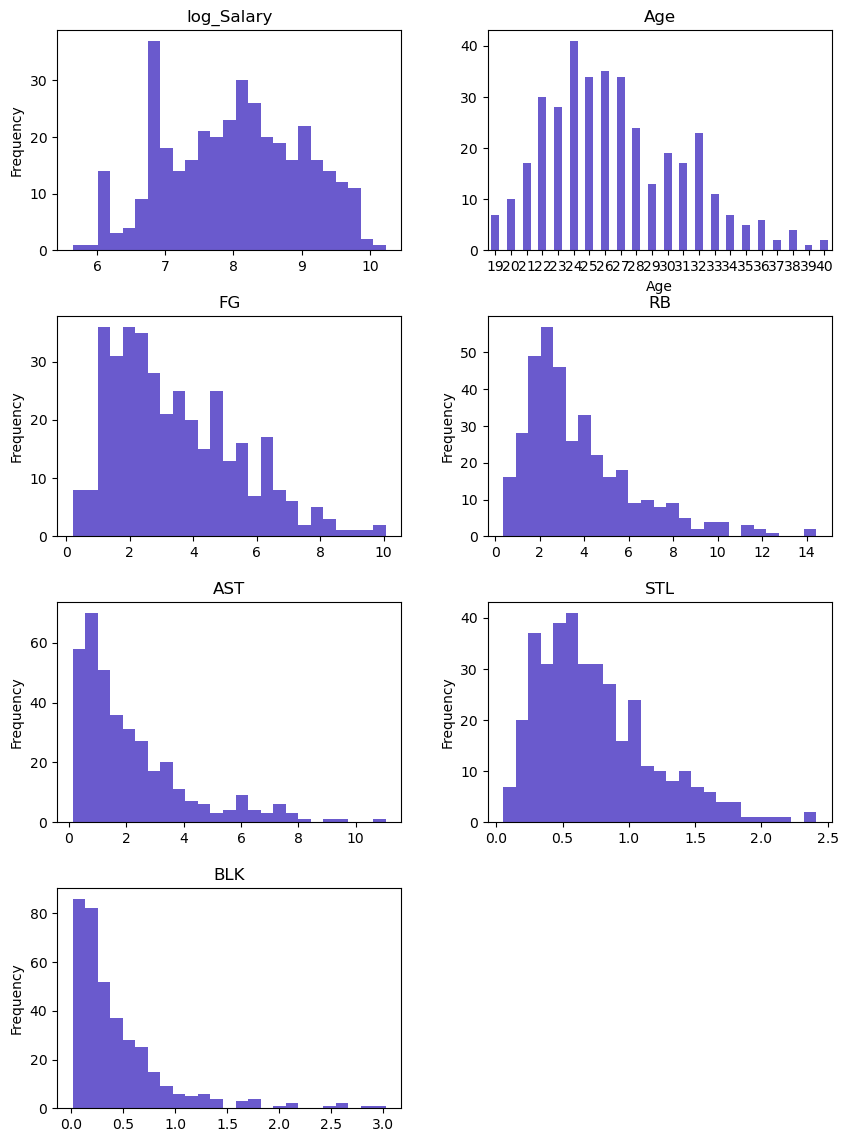

In [7]:
reg2 = rsm.regress({"nba_df": nba_df}, rvar="log_Salary", evar=["Age", "FG", "RB", "AST", "STL", "BLK"])
reg2.plot("distr")

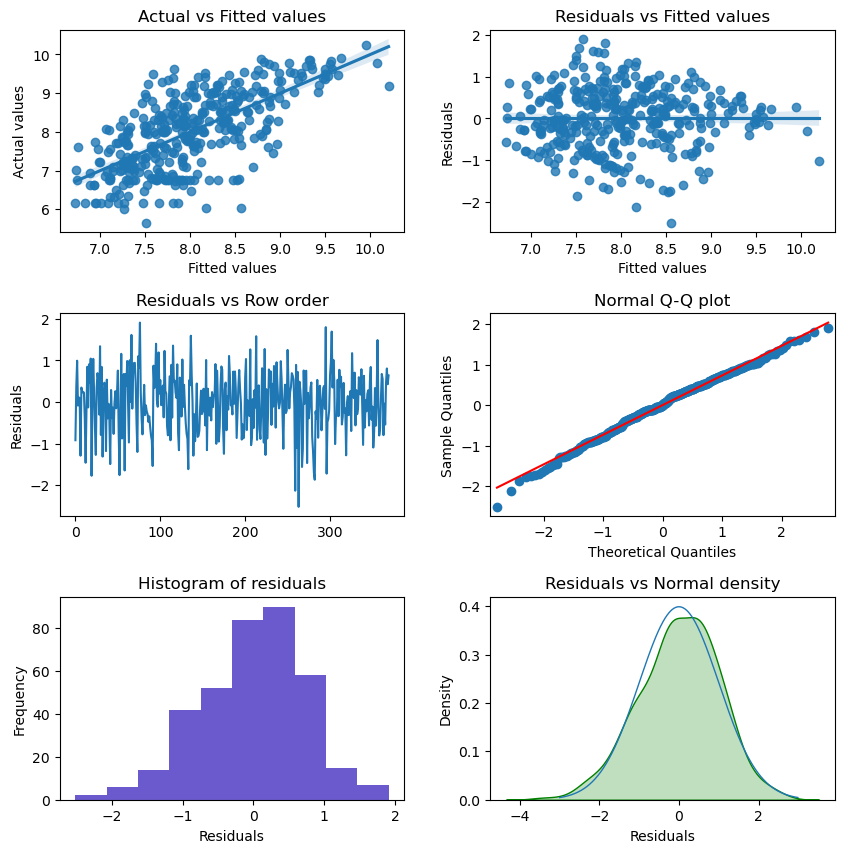

In [8]:
reg2.plot("dashboard")

In [9]:
reg2.summary()

Linear regression (OLS)
Data                 : nba_df
Response variable    : log_Salary
Explanatory variables: Age, FG, RB, AST, STL, BLK
Null hyp.: the effect of x on log_Salary is zero
Alt. hyp.: the effect of x on log_Salary is not zero

           coefficient  std.error  t.value p.value     
Intercept        5.304      0.255   20.820  < .001  ***
Age              0.058      0.009    6.488  < .001  ***
FG               0.208      0.035    5.995  < .001  ***
RB               0.067      0.026    2.533   0.012    *
AST              0.046      0.033    1.403   0.161     
STL              0.002      0.138    0.012   0.991     
BLK              0.210      0.116    1.807   0.072    .

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.455, Adjusted R-squared: 0.446
F-statistic: 50.611 df(6, 363), p.value < 0.001
Nr obs: 370


Histogram Comparison: Salary vs. log_Salary

•	The histogram for log_Salary is more symmetric and resembles a normal distribution, which aligns better with assumptions of linear regression. This transformation reduces skewness, especially at higher salaries, making it more suitable for regression analysis.

Interpretation of Regression B Coefficients

•	With log_Salary as the response variable, each coefficient represents the proportional change in Salary for a one-unit increase in the predictor, holding other variables constant.

•	For instance, a one-unit increase in Age is associated with a 5.8% increase in Salary, given the log transformation (￼).

Key Findings:

1.	Significant Predictors:

•	Age (p < 0.001) and FG (p < 0.001) remain highly significant.

•	RB (p ≈ 0.012) is now statistically significant, showing that rebounds positively impact salary.

2.	Non-Significant Predictors:

•	AST (p ≈ 0.161) and STL (p ≈ 0.991) have high p-values, suggesting no significant effect on log-transformed Salary.

•	BLK has a p-value of 0.072, marginally significant, suggesting a weak positive relationship with log-transformed Salary.

R-Squared and Model Fit:

•	R-squared = 0.455: With log-transformed Salary, the R-squared value is slightly lower than in Regression A. This suggests that the linear relationship explains around 45.5% of the variability in log-transformed Salary, which is reasonable.

Dashboard Regression Plots for log_Salary:

1.	Actual vs. Fitted Values: Improved alignment is likely because log transformation mitigates outlier impact.

2.	Residuals vs. Fitted Plot: Residuals may appear more randomly scattered, indicating an improvement over the untransformed model. However, any non-random patterns could suggest further modeling adjustments.

3.	Normal Q-Q Plot: Residuals should more closely follow the theoretical line, confirming better normality.

4.	Histogram and Density of Residuals: The distribution should be closer to normal, indicating improved residual behavior after log transformation.

Conclusion:

Using log-transformed Salary as the response variable enhances the model’s adherence to linear regression assumptions, particularly in normalizing residuals and reducing skewness. This transformation provides a more interpretable model where coefficients indicate proportional effects on Salary.

### Regression C
Keeping log Salary in the model, add the predictor PTS to the model

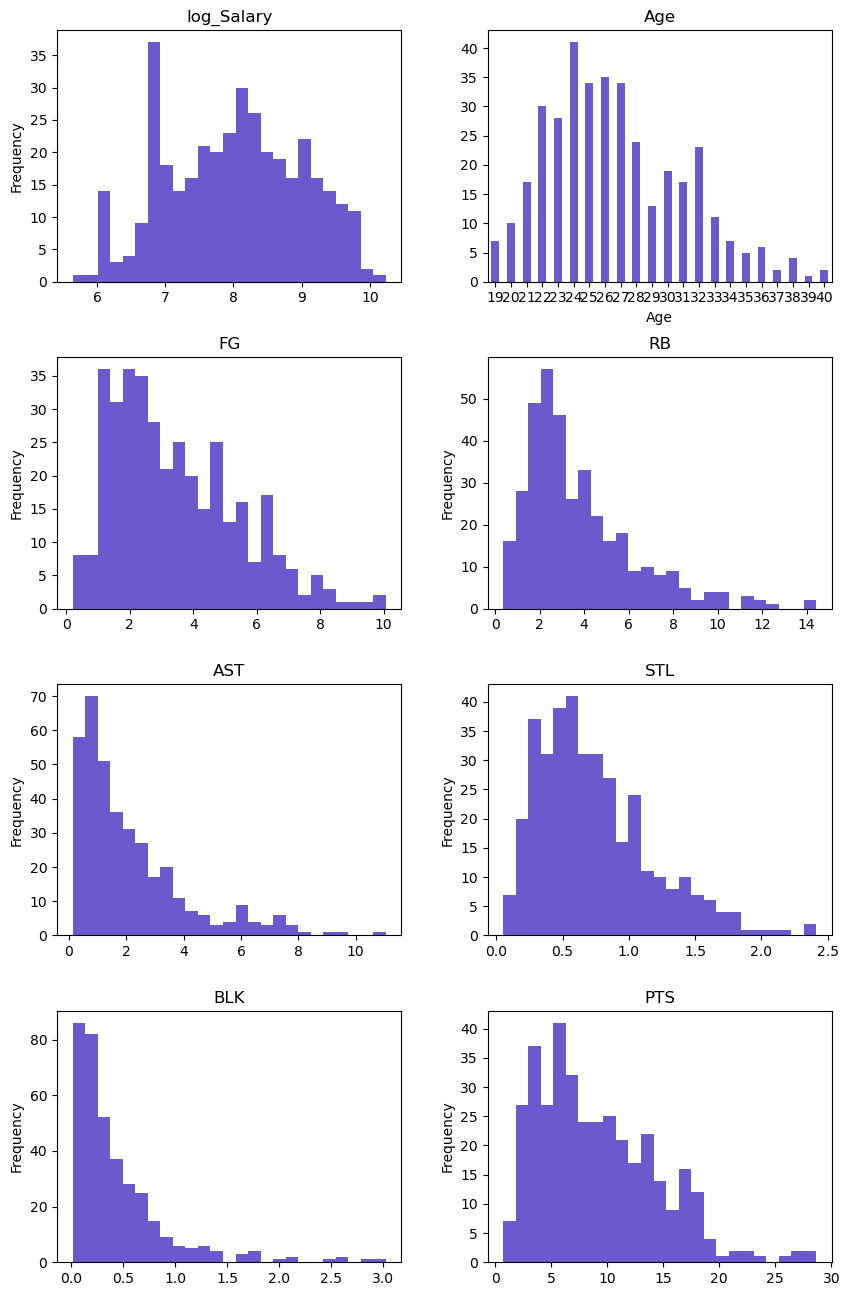

In [10]:
reg3 = rsm.regress({"nba_df": nba_df}, rvar="log_Salary", evar=["Age", "FG", "RB", "AST", "STL", "BLK", "PTS"])
reg3.plot("distr")

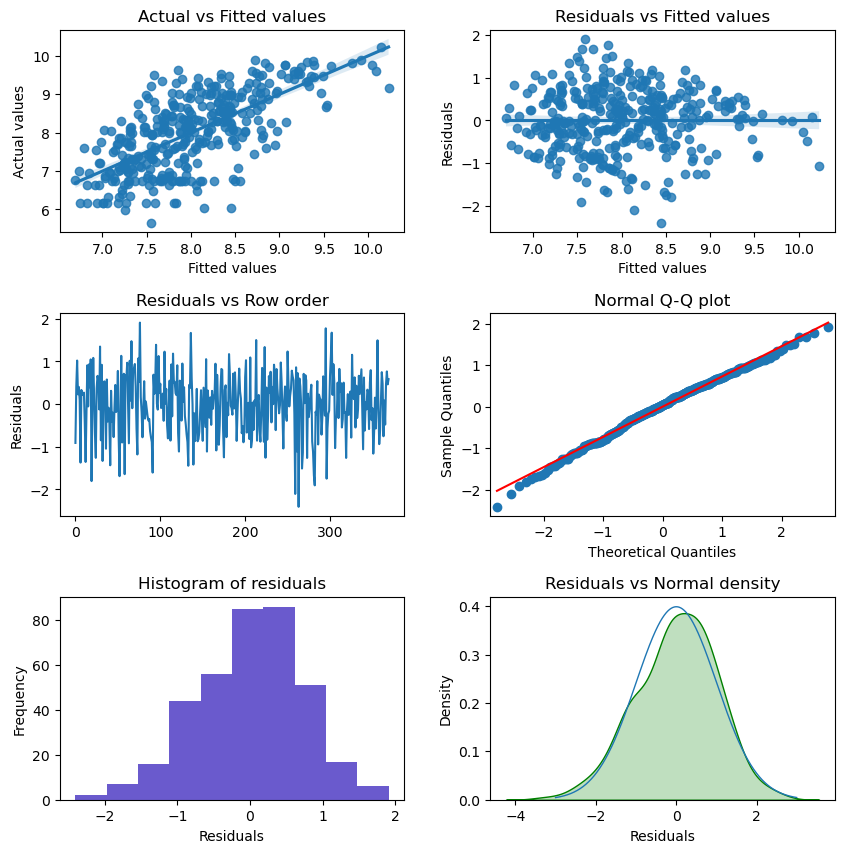

In [11]:
reg3.plot("dashboard")

In [12]:
reg3.summary()

Linear regression (OLS)
Data                 : nba_df
Response variable    : log_Salary
Explanatory variables: Age, FG, RB, AST, STL, BLK, PTS
Null hyp.: the effect of x on log_Salary is zero
Alt. hyp.: the effect of x on log_Salary is not zero

           coefficient  std.error  t.value p.value     
Intercept        5.298      0.253   20.961  < .001  ***
Age              0.058      0.009    6.525  < .001  ***
FG              -0.117      0.130   -0.901   0.368     
RB               0.083      0.027    3.081   0.002   **
AST              0.044      0.033    1.348   0.179     
STL             -0.052      0.139   -0.379   0.705     
BLK              0.251      0.117    2.153   0.032    *
PTS              0.119      0.046    2.592    0.01   **

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.465, Adjusted R-squared: 0.455
F-statistic: 45.024 df(7, 362), p.value < 0.001
Nr obs: 370


1.	Changes in Coefficients and Significance:

•	Age remains highly significant, with a similar coefficient to previous regressions, indicating a consistent relationship between age and salary.

•	RB (Rebounds) and BLK (Blocks) are now statistically significant, showing positive effects on log-transformed salary.

•	PTS (Points) has a significant positive coefficient (p ≈ 0.01), suggesting that scoring points has a meaningful impact on salary.

•	FG (Field Goals), which was previously significant, is no longer significant (p ≈ 0.368) after adding PTS. This suggests a strong overlap between FG and PTS, possibly due to their similar nature in reflecting offensive contributions.

2.	Non-Significant Predictors:

•	AST (Assists) and STL (Steals) remain non-significant, suggesting that these variables may not have a strong impact on salary after accounting for other variables.

3.	Interpretation of PTS Impact:

•	The addition of PTS helps explain more of the variability in salary, particularly for higher-scoring players, which may not have been fully captured by FG alone.

•	Given that PTS and FG are closely related (as scoring involves field goals), it’s likely that PTS is capturing some of the variability initially explained by FG. This might explain why FG becomes insignificant in this model.

R-Squared and Model Fit:

•	R-squared = 0.465: The model explains 46.5% of the variability in log-transformed salary, a slight improvement over previous models. Adding PTS has improved model fit but only marginally, as it partially overlaps with FG.

Dashboard Regression Plots:

1.	Actual vs. Fitted Values: The alignment is likely further improved with the inclusion of PTS, as it captures variability in scoring, a key component of player valuation.

2.	Residuals vs. Fitted Plot: Any observed improvement in random scattering would confirm that adding PTS reduces heteroscedasticity related to scoring variability.

3.	Normal Q-Q Plot and Residual Histograms: Residuals might better adhere to normality as the model now includes a more comprehensive representation of offensive performance.

Conclusion:

Adding PTS to the model has improved the overall fit and reduced the significance of FG, highlighting potential multicollinearity between these two variables. This model captures the effect of offensive performance on salary more comprehensively by including PTS as a scoring indicator, while FG alone may not have been sufficient. This demonstrates the importance of testing related predictors to see which best captures the underlying data structure.

### Regression D
keeping log Salary in the model, drop FG and use PTS instead

In [13]:
from sklearn.preprocessing import StandardScaler
df = nba_df.copy()
df[["log_Salary", "Age", "RB", "AST", "STL", "BLK", "PTS"]] = StandardScaler().fit_transform(df[["log_Salary", "Age", "RB", "AST", "STL", "BLK", "PTS"]])
df.head()

,Player,Salary,Age,FG,RB,AST,STL,BLK,PTS,log_Salary
0,A.J. Price,885.12,-0.157805,2.824561,-0.719682,0.762419,-0.370494,-0.836252,-0.266475,-1.226833
1,Aaron Brooks,3250.00,0.300139,2.698113,-0.918053,0.001467,-0.400422,-0.544144,-0.386471,0.081243
2,Al Harrington,6687.40,1.216028,2.000000,-0.436623,-0.604402,-0.785342,-0.734547,-0.758941,0.807212
3,Al Horford,12000.00,-0.157805,7.783784,2.608174,0.576465,0.730930,1.313906,1.541787,1.395520
4,Al Jefferson,15000.00,0.300139,7.833333,2.204224,-0.024001,0.665061,1.500643,1.619184,1.620056


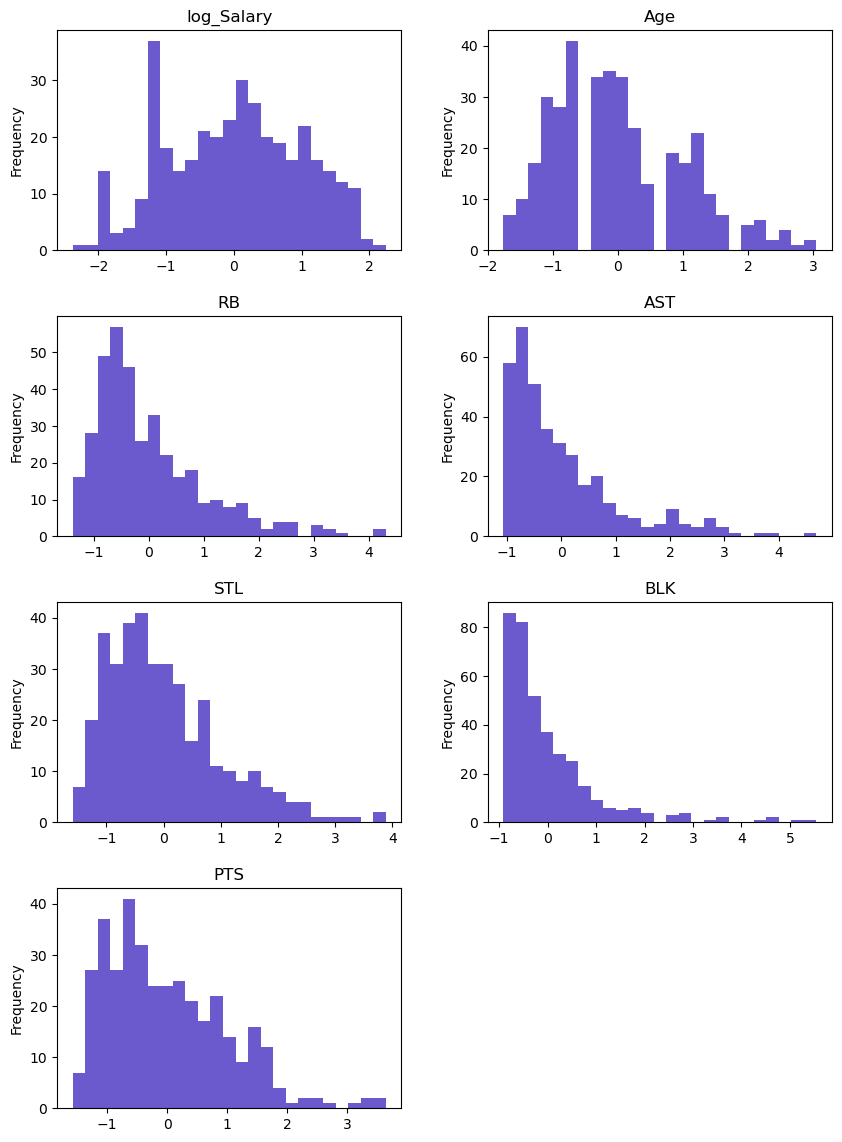

In [14]:
reg4 = rsm.regress({"nba_df": df}, rvar="log_Salary", evar=["Age", "RB", "AST", "STL", "BLK", "PTS"])
reg4.plot("distr")

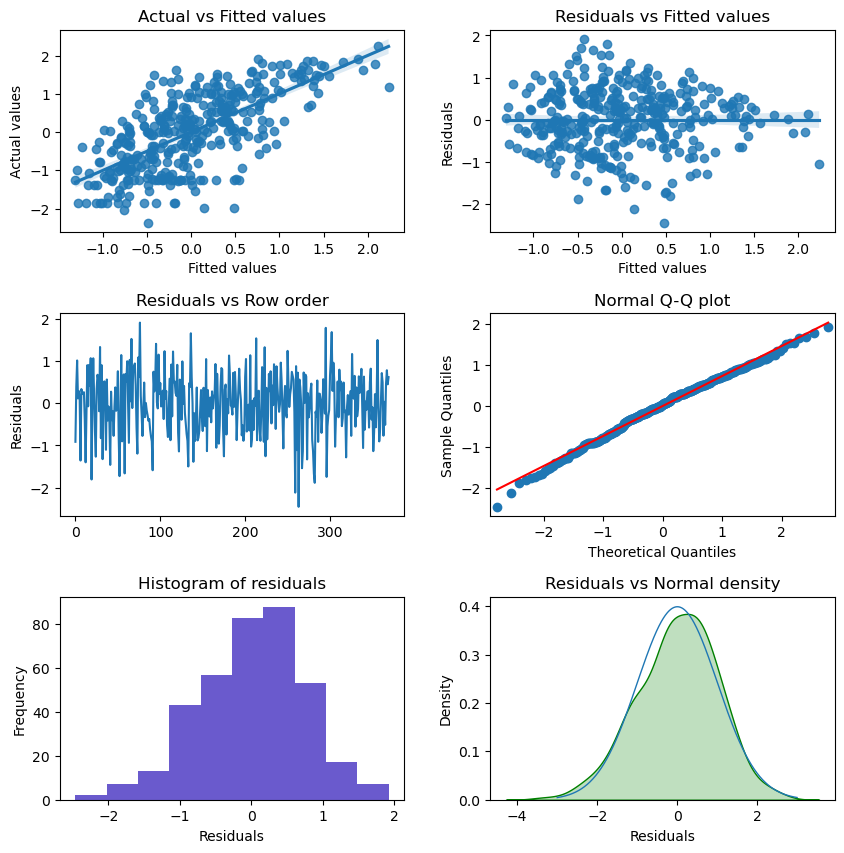

In [15]:
reg4.plot("dashboard")

In [16]:
reg4.summary()

Linear regression (OLS)
Data                 : nba_df
Response variable    : log_Salary
Explanatory variables: Age, RB, AST, STL, BLK, PTS
Null hyp.: the effect of x on log_Salary is zero
Alt. hyp.: the effect of x on log_Salary is not zero

           coefficient  std.error  t.value p.value     
Intercept        0.000      0.038    0.000     1.0     
Age              0.254      0.039    6.545  < .001  ***
RB               0.185      0.063    2.953   0.003   **
AST              0.079      0.062    1.267   0.206     
STL             -0.018      0.060   -0.302   0.763     
BLK              0.111      0.054    2.046   0.042    *
PTS              0.428      0.066    6.514  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.464, Adjusted R-squared: 0.455
F-statistic: 52.42 df(6, 363), p.value < 0.001
Nr obs: 370


Interpretation of Standardized Coefficients in Regression D:

1.	Magnitude of Impact:

•	The larger the absolute value of a standardized coefficient, the stronger its impact on the response variable (log_Salary) in standard deviation terms.

•	PTS (0.428) has the largest standardized coefficient, indicating it has the most substantial impact on log-transformed salary among the predictors. This reinforces the importance of scoring (PTS) as a determinant of salary.

•	Age (0.254) and RB (0.185) also have meaningful impacts, but they are less influential than PTS.

•	BLK (0.111) is significant but has a smaller effect size, indicating that blocking contributes to salary but to a lesser extent than other factors.

2.	Non-Significant Predictors:

•	AST (0.079) and STL (-0.018) have small, non-significant coefficients, indicating that assists and steals do not contribute much to explaining salary variance in this model.

3.	Comparison Across Predictors:

•	With standardized coefficients, we can see that PTS is more than twice as impactful as Age in terms of standard deviations. This clear comparison wasn’t possible when coefficients were in original units, as each variable was measured differently.

R-Squared and Model Fit:

•	R-squared = 0.464: The R-squared value remains consistent with Regression C, indicating the model explains about 46.4% of the variability in log-transformed salary. Using standardized coefficients does not affect model fit metrics like R-squared but rather aids in interpreting the relative importance of each predictor.

Summary:

Using standardized coefficients simplifies the interpretation of the predictors’ relative importance. 

In this regression:

•	PTS is the most influential predictor of log_Salary.

•	Age and RB are moderately influential.

•	AST and STL have minimal impact, as shown by their low standardized coefficients and non-significance.

# Hot Hand Hypothesis Testing

### Conditional Probability Approach

In [17]:
# P(hit | 1 miss) = P(hit and 1 miss) / P(1 miss)
# P(hit | 1 hit) = P(hit and 1 hit) / P(1 hit) = P(hit and 1 miss) / (1 - P(1 miss))

data = {
    'Player': ['Player A', 'Player B', 'Player C', 'Player D', 'Player E', 'Player F', 'Player G', 'Player H', 'Player I'],
    'P(hit | 1 miss)': [0.56, 0.51, 0.46, 0.60, 0.47, 0.51, 0.58, 0.52, 0.71],
    'P(hit)': [0.50, 0.52, 0.46, 0.56, 0.47, 0.46, 0.54, 0.52, 0.62],
    'P(hit | 1 hit)': [0.49, 0.53, 0.46, 0.55, 0.45, 0.43, 0.53, 0.51, 0.57]
}

# Create DataFrame
df = pd.DataFrame(data)

df

,Player,P(hit | 1 miss),P(hit),P(hit | 1 hit)
0,Player A,0.56,0.50,0.49
1,Player B,0.51,0.52,0.53
2,Player C,0.46,0.46,0.46
3,Player D,0.60,0.56,0.55
4,Player E,0.47,0.47,0.45
5,Player F,0.51,0.46,0.43
6,Player G,0.58,0.54,0.53
7,Player H,0.52,0.52,0.51
8,Player I,0.71,0.62,0.57


In [18]:
# Calculate the difference between P(hit | 1 hit) and P(hit | 1 miss) for each player
df['Difference'] = df['P(hit | 1 hit)'] - df['P(hit | 1 miss)']
df

,Player,P(hit | 1 miss),P(hit),P(hit | 1 hit),Difference
0,Player A,0.56,0.50,0.49,-0.07
1,Player B,0.51,0.52,0.53,0.02
2,Player C,0.46,0.46,0.46,0.00
3,Player D,0.60,0.56,0.55,-0.05
4,Player E,0.47,0.47,0.45,-0.02
5,Player F,0.51,0.46,0.43,-0.08
6,Player G,0.58,0.54,0.53,-0.05
7,Player H,0.52,0.52,0.51,-0.01
8,Player I,0.71,0.62,0.57,-0.14


* **$H_0$:** The mean of the difference is 0  (no hot hand effect).

* **$H_a$:** The mean of the difference is > 0 (hot hand effect exists, meaning P(hit | 1 hit) > P(hit | 1 miss))

Single mean test
Data      : df
Variables : Difference
Confidence: 0.95
Comparison: 0

Null hyp. : the mean of Difference is equal to 0
Alt. hyp. : the mean of Difference is greater than 0

  mean  n  n_missing    sd    se    me
-0.044  9          0 0.049 0.016 0.037
  diff    se  t.value  p.value  df   5.0%  100%  
-0.044 0.016   -2.734    0.987   8 -0.075   inf  

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


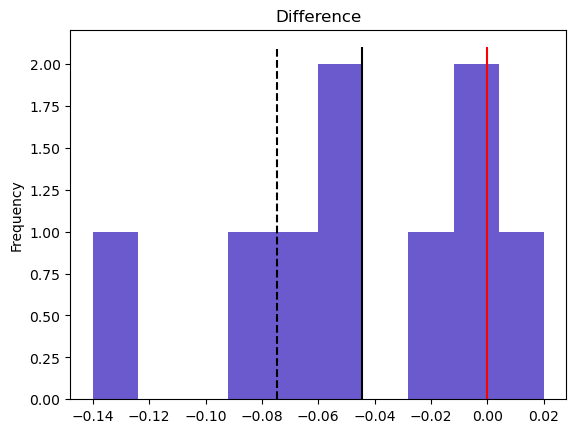

In [19]:
sm = rsm.basics.single_mean({"df": df}, 'Difference', "greater", 0.95, 0)
sm.summary()
sm.plot()

t-value = -2.734: The test statistic is negative, indicating that the mean difference is significantly below zero.

p-value = 0.987 (one-tailed test): The probability of observing such a result (or more extreme) under the null hypothesis, in the direction of **$H_a$** high p-value indicates no evidence to reject **$H_0$**.

Lower Bound = -0.075, Upper Bound = Infinity (for one-tailed test):

Since the confidence interval includes 0, it further suggests no significant positive mean difference.

Conclusion:

•	Significance Level: The p-value 0.987 is far greater than 0.05, so we fail to reject **$H_0$**. There is no statistical evidence to suggest that the mean difference is greater than zero.
	
•	Interpretation: This result suggests that, for the players analyzed, ***hot hand effect does not exist***. On average, players are slightly less likely to hit after a successful shot, though the difference is small and not statistically significant.

This detailed output reflects the earlier findings and provides a thorough explanation of why the data ***does not*** support the hot hand hypothesis.

### Streaks Approach

In [20]:
player_data = {
    'Player': ['Player A', 'Player B', 'Player C', 'Player D', 'Player E', 'Player F', 'Player G', 'Player H', 'Player I'],
    'Shots': [248, 884, 419, 339, 272, 451, 433, 351, 403],
    'P(hit)': [0.50, 0.52, 0.46, 0.56, 0.47, 0.46, 0.54, 0.52, 0.62],
    'Actual Runs': [128, 431, 203, 172, 134, 245, 227, 176, 220]
}

# Create a DataFrame from the player data
df_runs = pd.DataFrame(player_data)

df_runs

,Player,Shots,P(hit),Actual Runs
0,Player A,248,0.50,128
1,Player B,884,0.52,431
2,Player C,419,0.46,203
3,Player D,339,0.56,172
4,Player E,272,0.47,134
5,Player F,451,0.46,245
6,Player G,433,0.54,227
7,Player H,351,0.52,176
8,Player I,403,0.62,220


In [21]:
# Simulation parameters
N = 10000  # Number of simulations for each player

# Initialize lists to store expected runs and standard deviation of runs
expected_runs = []
std_dev_runs = []

# Function to count runs in a sequence of hits and misses
def count_runs(sequence):
    runs = 1  # Start with the first item as the beginning of the first run
    for i in range(1, len(sequence)):
        if sequence[i] != sequence[i - 1]:
            runs += 1
    return runs

# Run the simulation for each player
for index, row in df_runs.iterrows():
    n = row['Shots']
    p = row['P(hit)']
    
    # Simulate runs for the player
    run_counts = []
    for _ in range(N):
        # Generate a sequence of hits (1) and misses (0) based on p_hit
        sequence = np.random.binomial(1, p, n)
        # Count the number of runs in the sequence
        run_counts.append(count_runs(sequence))
    
    # Calculate the expected number and standard deviation of runs for this player
    expected_runs.append(np.mean(run_counts))
    std_dev_runs.append(np.std(run_counts))

# Add the expected runs and standard deviation to the DataFrame
df_runs['Expected Number of Runs'] = expected_runs
df_runs['Standard Deviation of Runs'] = std_dev_runs

In [22]:
df_runs

,Player,Shots,P(hit),Actual Runs,Expected Number of Runs,Standard Deviation of Runs
0,Player A,248,0.50,128,124.5311,7.836366
1,Player B,884,0.52,431,441.9069,14.750011
2,Player C,419,0.46,203,208.7679,10.300681
3,Player D,339,0.56,172,167.7142,9.341741
4,Player E,272,0.47,134,136.2055,8.291892
5,Player F,451,0.46,245,224.6516,10.645047
6,Player G,433,0.54,227,215.8069,10.216830
7,Player H,351,0.52,176,175.6839,9.376630
8,Player I,403,0.62,220,190.5575,10.575429


* **$H_0$:** The mean of Actual Runs is equal to the mean of Expected Runs across all players (no hot hand effect).

* **$H_a$:** The mean of Actual Runs is greater than the mean of Expected Runs (hot hand effect).

Pairwise mean comparisons (t-test)
Data      : df_runs
Variables : variable, value
Samples   : independent
Confidence: 0.95
Adjustment: None
               variable    mean  n  n_missing     sd     se     me
            Actual Runs 215.111  9          0 90.394 30.131 69.483
Expected Number of Runs 209.536  9          0 93.624 31.208 71.965
                            Null hyp.                                        Alt. hyp.  diff p.value    se  t.value    df    5.0%  100%  
Actual Runs = Expected Number of Runs Actual Runs greater than Expected Number of Runs 5.575    0.45 43.38    0.129 15.98 -70.167   inf  

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


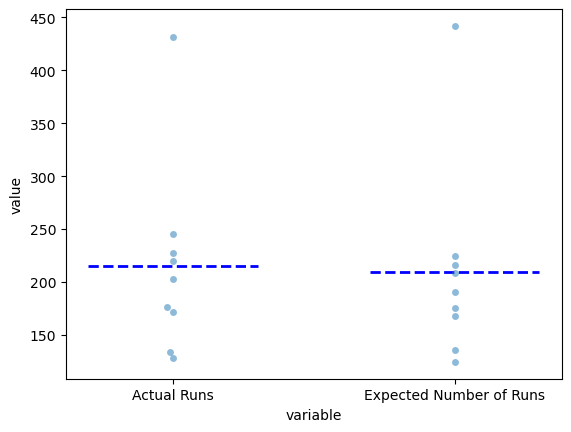

In [23]:
cm = rsm.basics.compare_means({"df_runs": df_runs}, var1="Actual Runs", 
                              var2="Expected Number of Runs", alt_hyp="greater")
cm.summary(extra=True)
cm.plot()

Results:

1.	Descriptive Statistics:

•	Mean of Actual Runs: ￼215.111

•	Mean of Expected Runs: 209.495￼

•	The actual number of runs is slightly higher than the expected runs on average, but the difference is small.

2.	Test Statistic (t-value):

•	t = 0.129: The observed difference (5.616) is much smaller than what would be considered significant based on the variation in the data (standard error = 43.389).

3.	P-Value:

•	p = 0.449: The p-value is much greater than the standard threshold (￼), so we fail to reject the null hypothesis.

4.	Confidence Interval:

•	Lower bound: -70.141￼

•	Upper bound: inf￼ (since this is a one-sided test).

Interpretation:

1.	Fail to Reject **$H_0$:**

•	The data does not provide evidence that the actual number of runs is significantly greater than the expected number of runs.

2.	No Evidence of Streakiness:

•	Since the actual runs align closely with the expected runs under a random shooting model, there is no significant evidence to suggest streakiness or a hot hand effect across all players.

3.	Practical Implications:

•	Players’ shooting sequences appear consistent with what we would expect from random shooting probabilities.

Final Takeaway:

The pairwise t-test confirms the findings from earlier hypothesis testing (z-tests for individual players). The data suggests no significant deviation from the random shooting model for any player or on average across all players. There is ***no statistical support*** for the hot hand hypothesis based on the runs analysis.

# Critical Thinking

In [55]:
basketball_df = pd.read_parquet('BasketballRelationships.parquet')
basketball_df.head()

,attempts,percentage,points
0,905,0.438674,1057
1,1318,0.484067,1560
2,638,0.445141,705
3,474,0.474684,555
4,1489,0.449295,1920


In [56]:
reg5 = rsm.regress({"basketball_df": basketball_df}, rvar="percentage", evar=["points", "attempts"])

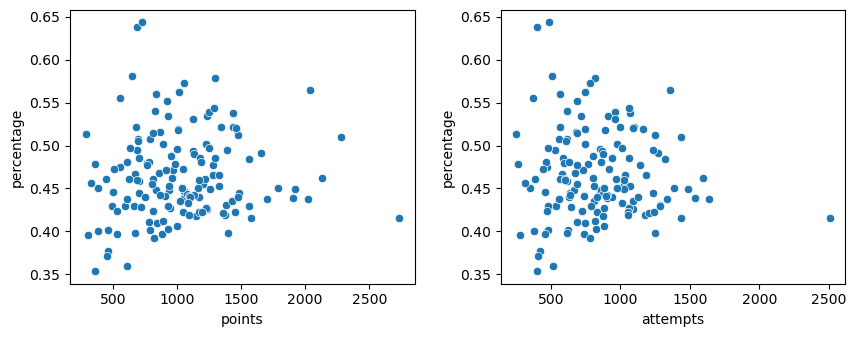

In [57]:
reg5.plot("scatterplot")

In [58]:
reg5.summary()

Linear regression (OLS)
Data                 : basketball_df
Response variable    : percentage
Explanatory variables: points, attempts
Null hyp.: the effect of x on percentage is zero
Alt. hyp.: the effect of x on percentage is not zero

           coefficient  std.error  t.value p.value     
Intercept         0.47       0.01   48.160  < .001  ***
points            0.00       0.00    7.456  < .001  ***
attempts         -0.00       0.00   -7.382  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.279, Adjusted R-squared: 0.269
F-statistic: 28.052 df(2, 145), p.value < 0.001
Nr obs: 148


Scatter Plot Observations

1.	Percentage vs. Points (Scatter Plot 1):

•	The scatter plot shows some positive trend where higher points correspond to slightly higher field goal percentages.

•	However, the relationship appears weak, with points scattered widely around the trendline.

•	This aligns with the regression coefficient for points (￼), indicating a small but positive effect.

2.	Percentage vs. Attempts (Scatter Plot 2):

•	The scatter plot shows a slight negative trend where higher attempts correspond to lower field goal percentages.

•	The data points are scattered without a strong clustering, suggesting variability in shooting efficiency for players with similar attempts.

•	This matches the regression coefficient for attempts (￼), showing a small negative relationship.

Key Insights

•	Points and Percentage:

•	Players scoring more points tend to have slightly better shooting percentages. This could indicate efficient scorers benefiting from high-percentage shots or free throws.

•	However, the weak effect suggests that scoring output is not solely driven by shooting efficiency but also by the volume of shots.

•	Attempts and Percentage:

•	Players with more shot attempts tend to have slightly lower percentages, which might reflect the difficulty of maintaining efficiency under high shooting volume or tougher defensive coverage.

Combined Analysis with Regression:

•	The regression results provide statistical confirmation of these observations:

•	Together, points and attempts explain 27.9% of the variability in field goal percentage, leaving much of the variance unexplained.

•	Both predictors are statistically significant, but their small coefficients indicate weak practical effects.

Conclusion:

1.	Points scored have a slight positive relationship with shooting efficiency.

2.	Shot attempts have a slight negative relationship with shooting efficiency.

3.	The relationships are statistically significant but weak, meaning other factors are likely influencing field goal percentage.

In [27]:
baseball_df = pd.read_parquet('BaseballRelationships.parquet')
baseball_df.head()

,atbats,hits,avg
0,384,97,0.252604
1,296,84,0.283784
2,334,94,0.281437
3,626,176,0.281150
4,558,130,0.232975


In [59]:
reg6 = rsm.regress({"baseball_df": baseball_df}, rvar="avg", evar=["hits", "atbats"])

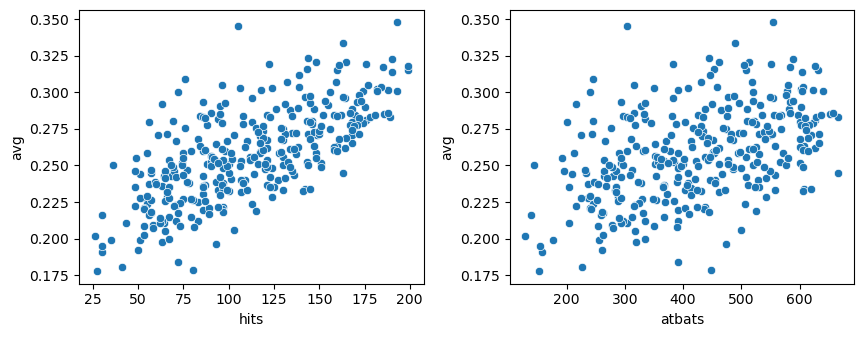

In [63]:
reg6.plot("scatterplot")

In [61]:
reg6.summary()

Linear regression (OLS)
Data                 : baseball_df
Response variable    : avg
Explanatory variables: hits, atbats
Null hyp.: the effect of x on avg is zero
Alt. hyp.: the effect of x on avg is not zero

           coefficient  std.error  t.value p.value     
Intercept        0.248      0.002  128.306  < .001  ***
hits             0.002      0.000   51.267  < .001  ***
atbats          -0.001      0.000  -40.580  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.914, Adjusted R-squared: 0.914
F-statistic: 1720.615 df(2, 323), p.value < 0.001
Nr obs: 326


1. Visualizations and Observations

•	Hits vs. Batting Average (avg):

•	The scatter plot shows a strong positive linear relationship.

•	Players with more hits tend to have higher batting averages, which aligns with the intuition that batting average is calculated as: avg = hits / atbats
￼
•	At-Bats vs. Batting Average (avg):

•	The scatter plot suggests a negative relationship: as the number of at-bats increases, the batting average tends to decrease slightly.

•	This could be because players with a higher number of at-bats may face tougher pitchers or might take more swings, leading to variability in their average.

2. Regression Results

The regression model predicts batting average (avg) based on hits and at-bats:

￼avg = 0.248 + 0.002 * hits - 0.001 * atbats

Coefficients:

•	Intercept (0.248):

•	This is the baseline batting average when both hits and at-bats are zero. While it’s mathematically necessary, it has no practical meaning in this context.

•	Hits (beta(hits) = 0.002, ￼p < 0.001):

•	For each additional hit, the batting average increases by 0.002.

•	This is statistically significant and shows that hits strongly and positively impact batting average.

•	At-Bats (beta(atbats) = -0.001, ￼p < 0.001):

•	For each additional at-bat, the batting average decreases by 0.001.

•	While statistically significant, the negative effect is weaker in magnitude than the positive effect of hits.

3. Model Performance

•   $R_2$ = 0.914:

•	The model explains 91.4% of the variance in batting average, indicating a very strong fit.

•	Adjusted $R_2$ = 0.914:

•	Virtually the same as ￼, suggesting no overfitting despite the inclusion of multiple predictors.

•	F-statistic (1720.615, p < 0.001):

•	The overall model is highly significant, meaning hits and at-bats collectively explain a significant amount of variance in batting average.

4. Key Takeaways

•	Hits are the strongest positive predictor of batting average. This makes intuitive sense since more hits directly increase the numerator in the batting average calculation.

•	At-Bats have a weaker but significant negative impact on batting average. This may reflect that higher at-bat counts lead to more variability or that some players with high at-bats maintain lower averages.

•	The model is very robust, explaining a large portion of the variance in batting average.

# Discussion: The Existence of the Hot Hand in Basketball

1. Hot Hand: Easier vs. More Difficult

	•	Basketball:
	
	•	Easier: Frequent scoring opportunities allow observing streaks; momentum and confidence can increase streakiness.

	•	Difficult: Team dynamics (e.g., feeding the “hot” player) and defensive adjustments may obscure streaks.

	•	Baseball:

	•	Easier: Independent, discrete outcomes (e.g., hits) make streaks easier to measure.

	•	Difficult: Few at-bats per game and randomness in batted balls complicate analysis.

2. Establishing the Hot Hand

	1.	Define the Hot Hand: Consecutive makes, improved shooting over baseline, or streak metrics.

	2.	Baseline Performance: Use historical shooting averages, accounting for difficulty and context.

	3.	Randomness Comparison: Simulate random outcomes (e.g., Bernoulli trials) and compare to observed data.

	4.	Context: Incorporate factors like game situation, shot type, and defensive pressure.

	5.	Data: Use large datasets spanning seasons and players for statistical power.

3. Building a Regression Model

	•	Response Variable: Binary shot outcome (1 = made) or short-term shooting percentage.

	•	Predictors:

	•	Hot hand metrics (e.g., streaks, current shooting % vs. baseline).

	•	Context (e.g., shot difficulty, score margin, defensive adjustments).

	•	Interaction terms (e.g., hot hand effect under defensive pressure).

4. Critical Predictors

	•	Hot Hand Indicators: Consecutive makes, performance vs. baseline.

	•	Contextual Variables: Shot difficulty, game situation, fatigue (e.g., minutes played).

5. Data Needs

	•	Shot-Level Data: Hundreds to thousands of shots per player across multiple seasons.

	•	Granularity: Detailed tracking data (e.g., shot location, defender proximity).
	
	•	Simulations: Compare observed streaks to random baselines.

Conclusion

The hot hand in basketball may exist but requires clear definitions, control for contextual factors, and robust statistical analysis. Advanced models and simulations could distinguish true streaks from random fluctuations.